In [1]:
%pylab inline
from app.analysis import Quote
bonds = Quote.screen_funds('Bonds', 'Domestic', 'Government', 'Long-Term')
equities = Quote.screen_funds('Equities', 'Domestic', 'Large-Cap', 'Growth')
print(len(bonds), len(equities))
quote = Quote(bonds + equities + ['TMF', 'SPXL'], 126, 5)
print(f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}')

Populating the interactive namespace from numpy and matplotlib
6 16
from 2019-02-11 to 2019-08-09 - 24


In [2]:
stats = quote.statistics()
assert stats[stats['len'] < stats['len'].max()].empty
stats = stats[stats['shrp'] > 0]
print(len(stats))
stats.sort_values('mean', ascending=False)

24


,len,mean,std,shrp,yield,drawdown
Symbols,,,,,,
TMF,122,0.344121,0.932679,0.361727,50.831630,9.129596
EDV,122,0.164613,0.434845,0.363042,21.907648,4.608950
TLT,122,0.125495,0.312895,0.379518,16.352133,3.084718
SPTL,122,0.123500,0.302862,0.385501,16.052573,2.930495
VGLT,122,0.123346,0.302654,0.385258,16.028630,2.936890
SPXL,122,0.122411,1.017419,0.113685,21.891336,19.502869
TLH,122,0.095570,0.209119,0.424754,12.144392,2.264987
MTUM,122,0.081799,0.318543,0.235615,12.904806,6.022435
MGK,122,0.075702,0.379694,0.181609,12.164236,8.647441


retry backlogs ['TMF', 'TLT', 'MGK', 'QQQ', 'IWY', 'SPTL', 'IEF', 'JKE', 'IVW', 'EDV', 'IWF', 'VGLT', 'VONG', 'VOOG', 'SPYG', 'FV', 'ONEQ', 'SCHG', 'RPG', 'SPXL', 'MTUM', 'IUSG'] at 0.905/-0.51 - 0.711
retry backlogs ['TMF', 'TLT', 'MGK', 'QQQ', 'IWY', 'SPTL', 'IEF', 'JKE', 'IVW', 'EDV', 'IWF', 'VGLT', 'VONG', 'VOOG', 'SPYG', 'FV', 'ONEQ', 'SCHG', 'RPG', 'SPXL', 'MTUM', 'IUSG'] at 0.910/-0.52 - 0.711
retry backlogs ['TMF', 'TLT', 'MGK', 'QQQ', 'IWY', 'SPTL', 'IEF', 'JKE', 'IVW', 'EDV', 'IWF', 'VGLT', 'VONG', 'VOOG', 'SPYG', 'FV', 'ONEQ', 'SCHG', 'RPG', 'SPXL', 'MTUM', 'IUSG'] at 0.915/-0.53 - 0.711
retry backlogs ['TMF', 'TLT', 'MGK', 'QQQ', 'IWY', 'SPTL', 'IEF', 'JKE', 'IVW', 'EDV', 'IWF', 'VGLT', 'VONG', 'VOOG', 'SPYG', 'FV', 'ONEQ', 'SCHG', 'RPG', 'SPXL', 'MTUM', 'IUSG'] at 0.920/-0.54 - 0.711
retry backlogs ['TMF', 'TLT', 'MGK', 'QQQ', 'IWY', 'SPTL', 'IEF', 'JKE', 'IVW', 'EDV', 'IWF', 'VGLT', 'VONG', 'VOOG', 'SPYG', 'FV', 'ONEQ', 'SCHG', 'RPG', 'SPXL', 'MTUM', 'IUSG'] at 0.925/-0.5

,count,mean,std,min,25%,50%,75%,max,shrp,yield,drawdown
Portfolio,122.0,0.088689,0.115479,-0.222781,0.008644,0.075870,0.179747,0.357448,0.709588,12.123215,1.107598
TLH,122.0,0.095570,0.209119,-0.399220,-0.029883,0.070395,0.194576,0.831847,0.424754,12.144392,2.264987
VUG,122.0,0.075076,0.373297,-1.270512,-0.133896,0.115593,0.287139,1.248317,0.183045,12.078421,8.023383


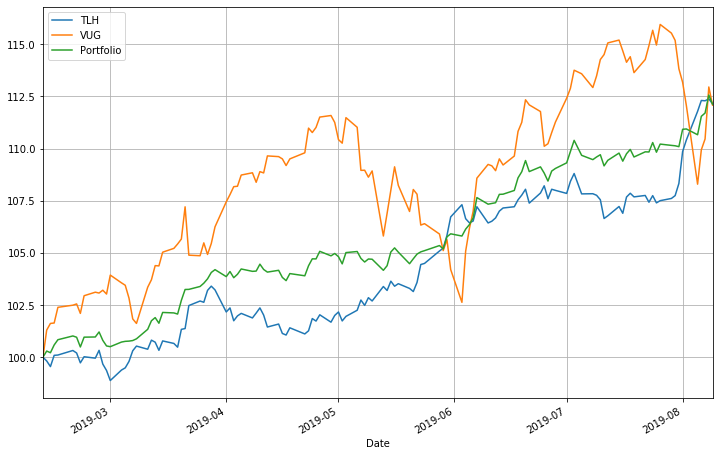

In [3]:
quote.setup_mask(stats.index)
sd = quote.optimize_portfolio()
quote.setup_mask(['TLH', 'MTUM'])
sd.update(quote.optimize_portfolio())
quote.setup_mask(['SPTL', 'VONG'])
sd.update(quote.optimize_portfolio())
quote.setup_mask(['TMF', 'SPXL'])
sd.update(quote.optimize_portfolio())
quote.setup_mask({e for r in sd.values() for e in r})
sd.update(quote.optimize_portfolio())
for e in sd:
    print(e, sd[e])
_, ratio = sd.peekitem()
quote.setup_mask(ratio)
quote.graph(ratio)

In [ ]:
quote.setup_mask(['MTUM', 'TLH'])
quote.graph({'MTUM': 0.43, 'TLH': 0.57})

In [ ]:
quote.setup_mask(['VONG', 'SPTL'])
quote.graph({'VONG': 0.43, 'SPTL': 0.57})

In [ ]:
quote.setup_mask(['SPXL', 'TMF'])
quote.graph({'SPXL': 0.43, 'TMF': 0.57})